# Competencia: Clasificación de Péptidos Antimicrobianos

El equipo está conformado por:

    Angie Melissa Calderón Albarracin
    Diego Alejandro Zapata Alcaraz
    Juan David Valencia Quiceno
    Juan Esteban Arroyave Duque

In [4]:
#Importar paquetes
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [58]:
#Cargar la data
data_positiva=pd.read_csv('DatosPositivos1.csv')
data_negativa=pd.read_csv('DatosNegativos1.csv')
data_validacion=pd.read_csv('DatosValidacion1.csv')

print('Forma de los datos positivos',data_positiva.shape)
print('Forma de los datos negativos',data_negativa.shape)
print('Forma de los datos validacion',data_validacion.shape)


#Nota: La clase 1, corresponde a los péptidos que SON antimicrobianos, 0 los que no.
# Adicional los datos están desbalanceados en la siguiente relacion 60% son positivos 40% negativos.

data_train=pd.concat([data_positiva,data_negativa])

Forma de los datos positivos (8322, 1761)
Forma de los datos negativos (5561, 1760)
Forma de los datos validacion (1623, 1762)


In [57]:
data_negativa.describe()

,length,molecular_weight,charge,charge_density,isoelectric_point,gravy,instability_index,aromaticity,aliphatic_index,boman_index,...,embed_2_91,embed_2_92,embed_2_93,embed_2_94,embed_2_95,embed_2_96,embed_2_97,embed_2_98,embed_2_99,class
count,5561.000000,5561.000000,5561.00000,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,...,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000,5561.0
mean,19.609962,2246.459347,0.69599,0.000283,7.539058,-0.081833,40.552330,0.105055,82.260596,1.337483,...,1.205239,-0.200029,-0.585082,0.474123,0.316676,-1.573244,-0.545874,-0.396946,0.134395,0.0
std,7.189959,825.130347,2.34795,0.001004,2.551504,0.879838,33.189909,0.082211,40.903645,1.533903,...,0.598283,0.274555,0.364099,0.309964,0.266020,0.752801,0.346502,0.338974,0.251595,0.0
min,6.000000,652.740000,-13.89400,-0.004634,3.124573,-3.814286,-43.391667,0.000000,0.000000,-3.992500,...,-0.047483,-1.766925,-2.326579,-0.598838,-0.571215,-4.317026,-2.170616,-1.964081,-0.985850,0.0
25%,14.000000,1621.930000,-0.90300,-0.000307,5.274963,-0.654545,17.569697,0.050000,53.500000,0.366923,...,0.753169,-0.360960,-0.808934,0.255603,0.123963,-2.049230,-0.764371,-0.591067,-0.018738,0.0
50%,19.000000,2145.550000,0.92800,0.000335,7.953430,-0.135714,36.546667,0.095238,79.375000,1.384000,...,1.132704,-0.173728,-0.543994,0.441233,0.288321,-1.473004,-0.498671,-0.344352,0.126981,0.0
75%,25.000000,2856.280000,1.99600,0.000899,9.688049,0.443478,58.800000,0.150000,107.000000,2.275000,...,1.580746,-0.020923,-0.319416,0.657980,0.483460,-1.005845,-0.282779,-0.157762,0.275643,0.0
max,35.000000,4678.560000,21.99600,0.005005,13.322205,3.483333,334.142424,0.600000,267.500000,10.167143,...,3.912584,0.739451,0.895369,2.141623,1.744501,-0.059117,0.430864,0.683690,2.059011,0.0


In [59]:
# Encontrar la columna que no se encuentra en los dos datasets (positivo y negativo)
col_val=data_validacion.columns
col_pos=data_positiva.columns
col_neg=data_negativa.columns

for i in col_val:
    if i not in col_neg:
        print(i, 'No se encuentra')

Unnamed: 0 No se encuentra
Unnamed: 0.1 No se encuentra


In [45]:
data_train.describe()

,Unnamed: 0,length,molecular_weight,charge,charge_density,isoelectric_point,gravy,instability_index,aromaticity,aliphatic_index,...,embed_2_91,embed_2_92,embed_2_93,embed_2_94,embed_2_95,embed_2_96,embed_2_97,embed_2_98,embed_2_99,class
count,8322.000000,13883.000000,13883.000000,13883.000000,13883.000000,13883.000000,13883.000000,13883.000000,13883.000000,13883.000000,...,13883.000000,13883.000000,13883.000000,13883.000000,13883.000000,13883.000000,13883.000000,13883.000000,13883.000000,13883.000000
mean,4162.764840,18.620975,2138.624343,2.053418,0.000987,8.646891,-0.115294,39.525427,0.112045,89.397352,...,1.139562,-0.215544,-0.529627,0.406345,0.317810,-1.484496,-0.513748,-0.380932,0.108051,0.599438
std,2404.195616,7.412932,818.158301,2.988259,0.001404,2.630805,0.950993,43.815094,0.101608,48.032890,...,0.615172,0.294301,0.361663,0.310349,0.292114,0.800792,0.345462,0.313235,0.244282,0.490030
min,0.000000,6.000000,524.530000,-13.894000,-0.007838,3.124573,-4.380000,-71.779167,0.000000,0.000000,...,-0.164153,-1.990376,-2.326579,-1.324751,-0.571215,-4.883934,-2.209890,-1.964081,-1.434467,0.000000
25%,2081.250000,13.000000,1502.930000,-0.003000,-0.000001,6.166931,-0.706905,10.454615,0.043478,54.444444,...,0.657780,-0.378314,-0.755308,0.184581,0.116210,-1.986449,-0.729327,-0.559722,-0.035038,0.000000
50%,4162.500000,18.000000,2033.600000,1.929000,0.000870,9.307678,-0.096000,32.290000,0.093750,86.666667,...,1.051497,-0.189158,-0.493484,0.370307,0.265731,-1.364299,-0.459027,-0.334937,0.100834,1.000000
75%,6243.750000,24.000000,2696.130000,3.994000,0.001863,10.602478,0.500000,58.557381,0.153846,120.000000,...,1.532093,-0.030654,-0.269180,0.593521,0.470867,-0.854565,-0.253328,-0.158772,0.245534,1.000000
max,8326.000000,35.000000,4727.630000,21.996000,0.006660,13.322205,3.523529,486.777778,0.833333,309.411765,...,4.018238,1.309641,1.477738,2.141623,2.673262,0.041220,0.628519,0.683690,2.059011,1.000000


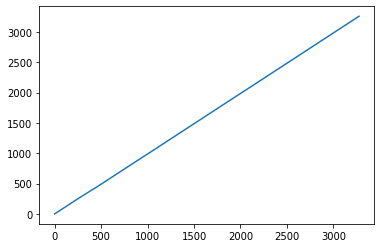

In [68]:
plt.plot(data_validacion['Unnamed: 0.1'],data_validacion['Unnamed: 0'])

In [72]:
aux=data_validacion[['Unnamed: 0.1','Unnamed: 0']]
aux.corr()

,Unnamed: 0.1,Unnamed: 0
Unnamed: 0.1,1.000000,0.999996
Unnamed: 0,0.999996,1.000000


### Preprocesamiento de los datos

In [19]:
print(data_train.shape)
data_train.head()
data_train.columns

(13883, 1761)


Index(['Unnamed: 0', 'sequence', 'length', 'molecular_weight', 'charge',
       'charge_density', 'isoelectric_point', 'gravy', 'instability_index',
       'aromaticity',
       ...
       'embed_2_91', 'embed_2_92', 'embed_2_93', 'embed_2_94', 'embed_2_95',
       'embed_2_96', 'embed_2_97', 'embed_2_98', 'embed_2_99', 'class'],
      dtype='object', length=1761)

### Estandariazación de los datos

In [21]:
#scaler=StandardScaler()
#aata_std=scaler.fit(data_train)